<a href="https://colab.research.google.com/github/ravikanth995/Projects/blob/master/CH4_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/IEA-MethaneEmissionsComparison-World.csv')
df

,region,country,emissions,source,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,IEA,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,IEA,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2022,NaN
3,Africa,Algeria,69.741898,IEA,Energy,Gas pipelines and LNG facilities,Vented,2022,NaN
4,Africa,Algeria,213.987000,IEA,Energy,Onshore gas,Fugitive,2022,NaN
...,...,...,...,...,...,...,...,...,...
1543,World,NaN,3102.500000,IEA,Energy,Satellite-detected large oil and gas emissions,All,2022,NaN
1544,World,NaN,30296.500000,IEA,Energy,Steam coal,All,2022,NaN
1545,World,NaN,133350.984375,IEA,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,World,NaN,9737.874023,IEA,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [13]:
df.shape

(1548, 9)

In [14]:
df.columns

Index(['region', 'country', 'emissions', 'source', 'type', 'segment', 'reason',
       'baseYear', 'notes'],
      dtype='object')

In [15]:
df.drop('notes', axis = 1, inplace = True)

In [16]:
df.head()

,region,country,emissions,source,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,IEA,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,IEA,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,IEA,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,IEA,Energy,Onshore gas,Fugitive,2022


In [17]:
df.isnull().sum()

region        0
country      22
emissions     0
source        0
type          0
segment       0
reason        0
baseYear      0
dtype: int64

In [18]:
df.dropna(inplace = True)

In [19]:
df.shape

(1526, 8)

In [20]:
df.isnull().sum()

region       0
country      0
emissions    0
source       0
type         0
segment      0
reason       0
baseYear     0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1525
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1526 non-null   object 
 1   country    1526 non-null   object 
 2   emissions  1526 non-null   float64
 3   source     1526 non-null   object 
 4   type       1526 non-null   object 
 5   segment    1526 non-null   object 
 6   reason     1526 non-null   object 
 7   baseYear   1526 non-null   object 
dtypes: float64(1), object(7)
memory usage: 107.3+ KB


In [22]:
df.rename(columns = {'region':'Region', 'country':'Country','emissions':'Emissions','source':'Source','type':'Type','segment':'Segment','reason':'Reason','baseYear':'BaseYear'},inplace = True)

In [23]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

In [24]:
df['Emissions'].value_counts()

0.004000      5
0.132000      3
0.300000      2
0.088000      2
0.028000      2
             ..
8.883480      1
136.112000    1
62.730598     1
60.367901     1
280.418243    1
Name: Emissions, Length: 1509, dtype: int64

In [25]:
df['Emissions'].describe()

count     1526.000000
mean       331.984226
std       1451.481353
min          0.000459
25%          2.588755
50%         22.501150
75%        114.979780
max      25372.222656
Name: Emissions, dtype: float64

In [26]:
df.describe()

,Emissions
count,1526.000000
mean,331.984226
std,1451.481353
min,0.000459
25%,2.588755
50%,22.501150
75%,114.979780
max,25372.222656


# **Exploratory Data Analysis**

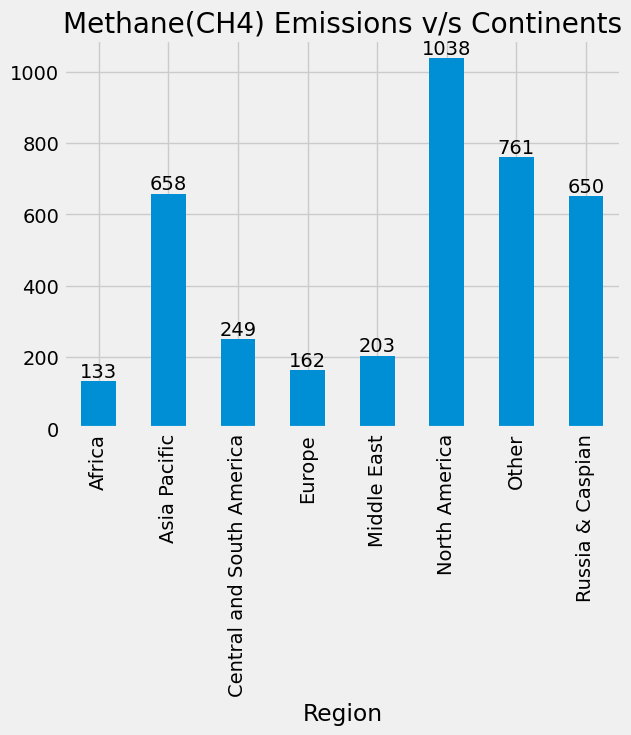

In [27]:
plt.style.use('fivethirtyeight')
data_group = df.groupby('Region')['Emissions'].mean()
ax = data_group.plot(kind = 'bar')
plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.title("Methane(CH4) Emissions v/s Continents")
plt.show()

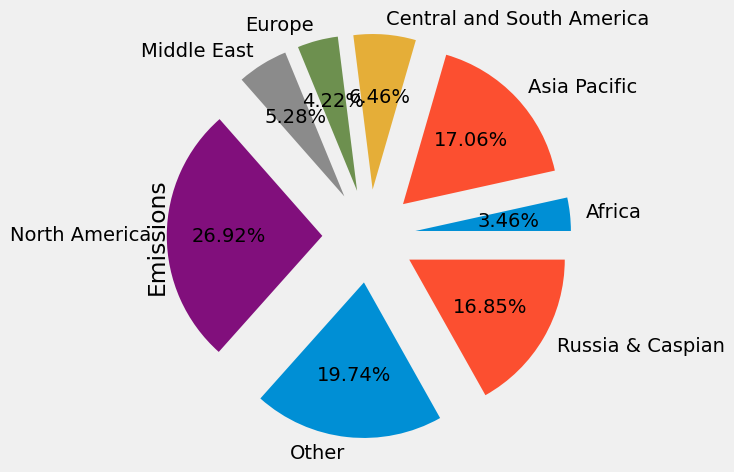

In [28]:
plt.style.use('fivethirtyeight')
explode = [0.3]*8
data_group = df.groupby('Region')['Emissions'].mean()
data_group.plot(kind = 'pie', autopct = '%.2f%%', explode = explode)
plt.show()

North America(USA and Canada) Constitutes about 26.92% of global CH4(Methan) gas Emmisions followed by the Asia Pacific about 17.06% of the World. 
The Least Emmission was in Africa which constitued about 3.46% of global CH4(Methan) gas Emission.
Both Asia Pacific and North America Contirbutes about more than 2/5 of the Global Methan Gas Emissions.

In [29]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

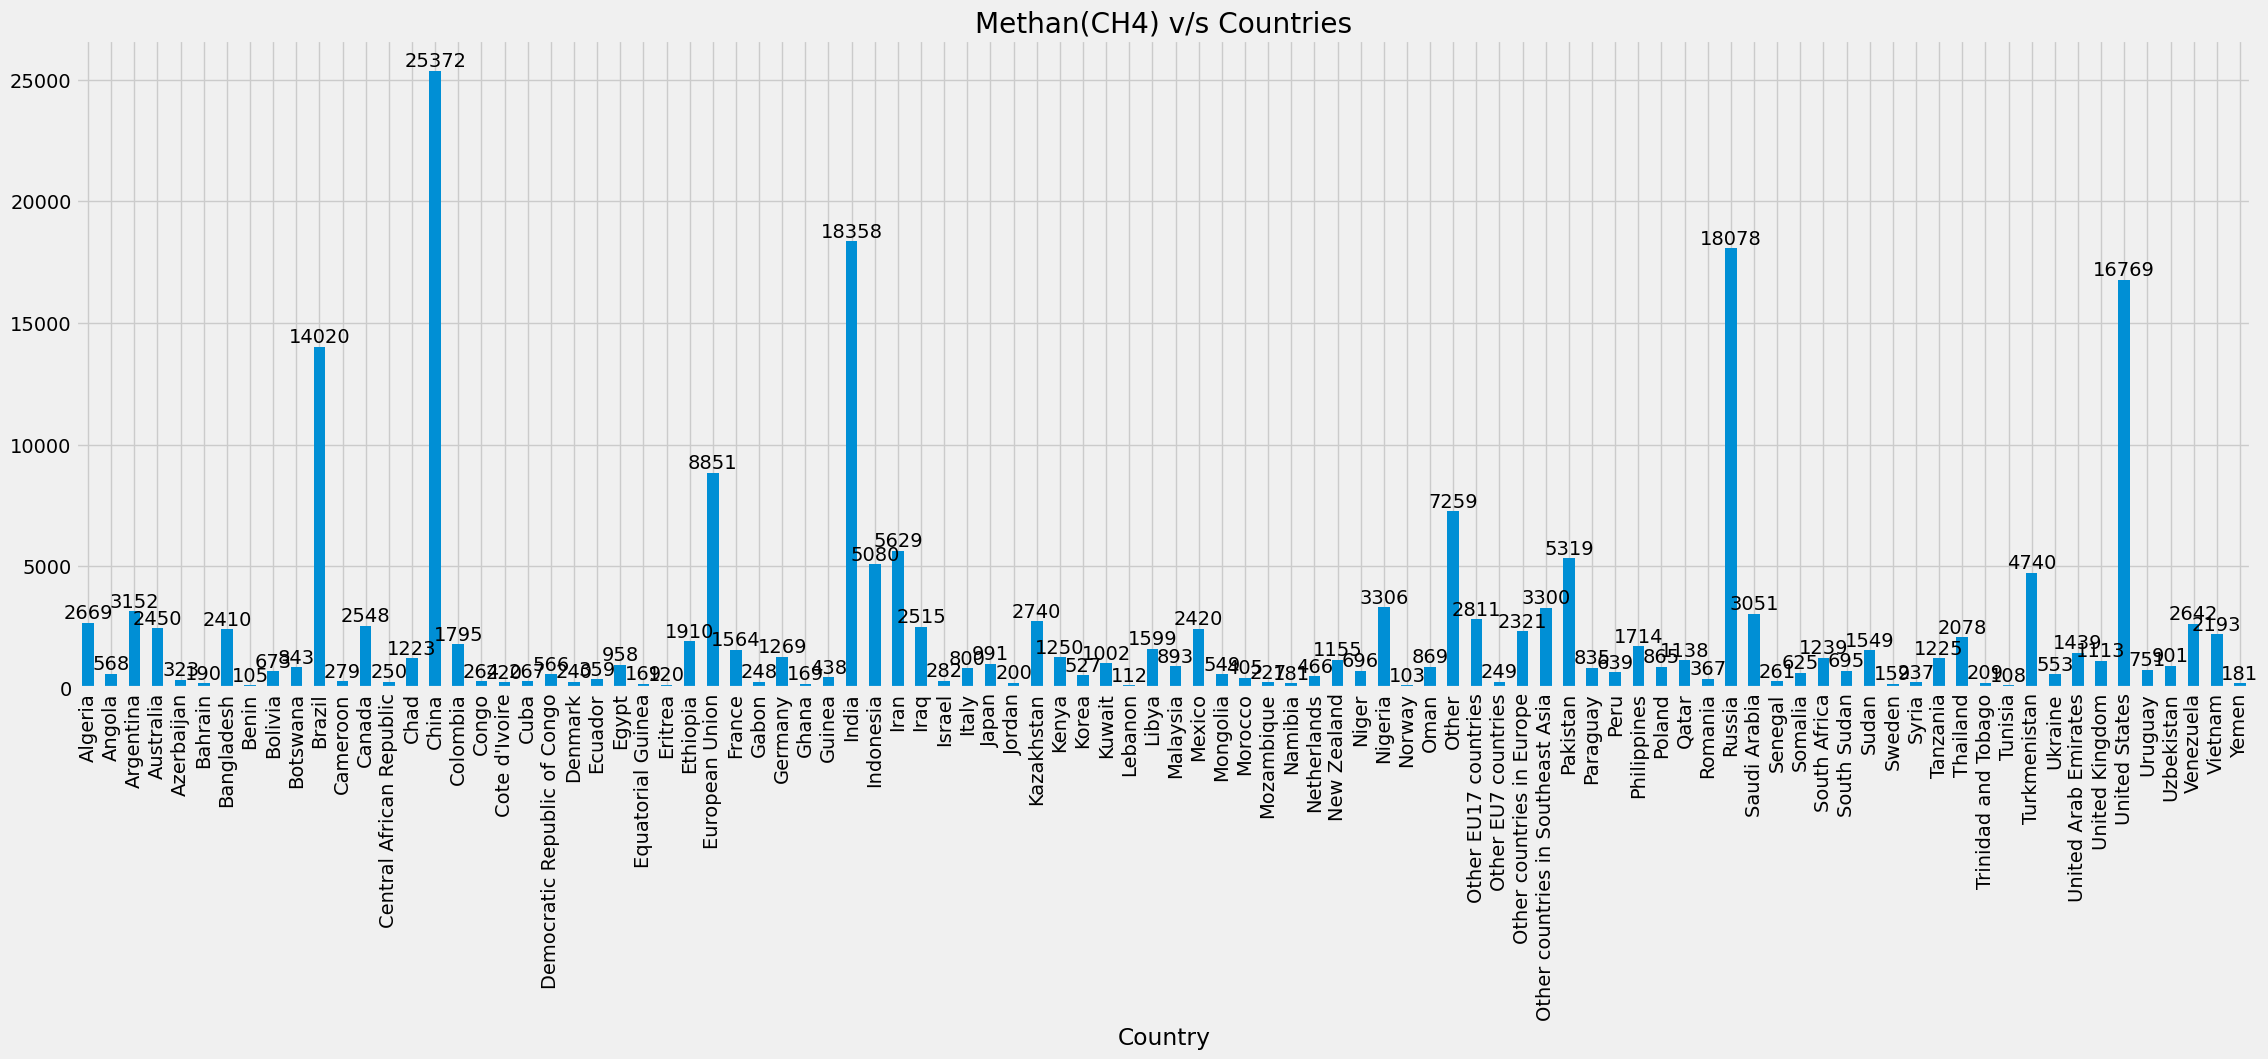

In [30]:
plt.figure(figsize=(25, 8))
data_group = df.groupby('Country')['Emissions'].max()

# Filter the data group based on values greater than 320
data_group = data_group[data_group >= 100]

ax = data_group.plot(kind='bar')
plt.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.title("Methan(CH4) v/s Countries")
plt.show()

India, China, USA, Brazil, Russia and European Union Produces majority of the Methan gas emissions in the environment than most part of the World.

In [31]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

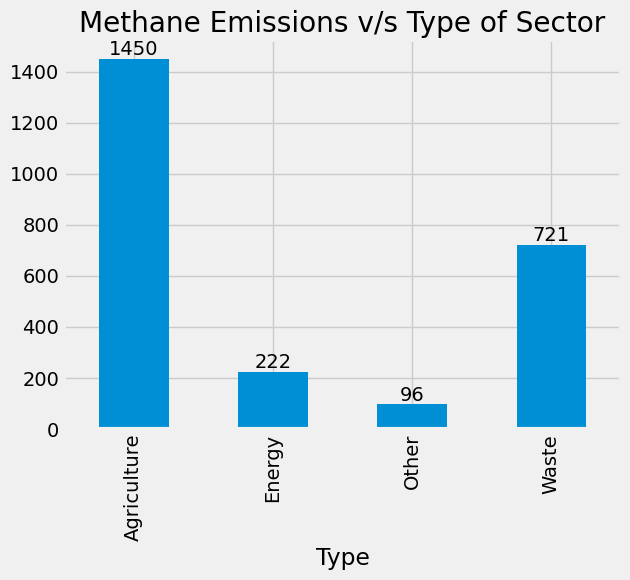

In [32]:
# plt.figure(figsize=(25, 8))
data_group = df.groupby('Type')['Emissions'].mean()


ax = data_group.plot(kind='bar')
plt.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.title("Methane Emissions v/s Type of Sector")
plt.show()

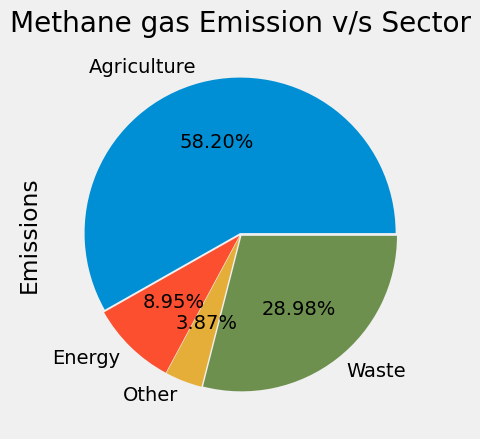

In [33]:
plt.style.use('fivethirtyeight')
explode = [0.0100]*4
data_group = df.groupby('Type')['Emissions'].mean()
data_group.plot(kind = 'pie', autopct = '%.2f%%', explode = explode)
plt.title("Methane gas Emission v/s Sector")
plt.show()

On an Average, Agriculture Produces more of Methane gas in the Atmosphere than, Waste, Energy and other sector.
Due to the Poultry and Animal Husbandry.

In [34]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

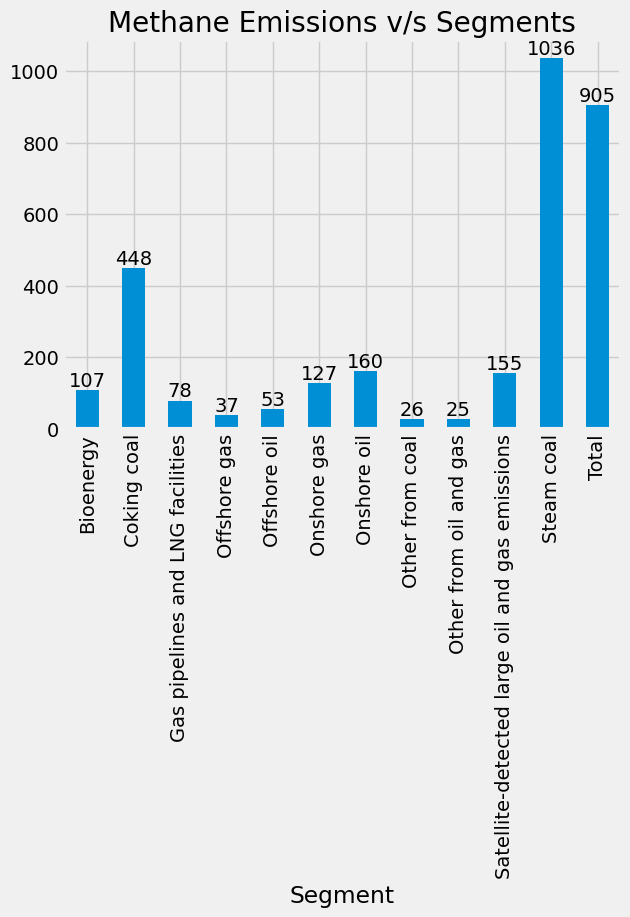

In [35]:
# plt.figure(figsize=(25, 8))
data_group = df.groupby('Segment')['Emissions'].mean()


ax = data_group.plot(kind='bar')
plt.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.title("Methane Emissions v/s Segments")
plt.show()

Steam Coal, Coking Coal and Onshore and Offshore Oil Extraction Produces more CH4 gas than any other Segments.

In [36]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

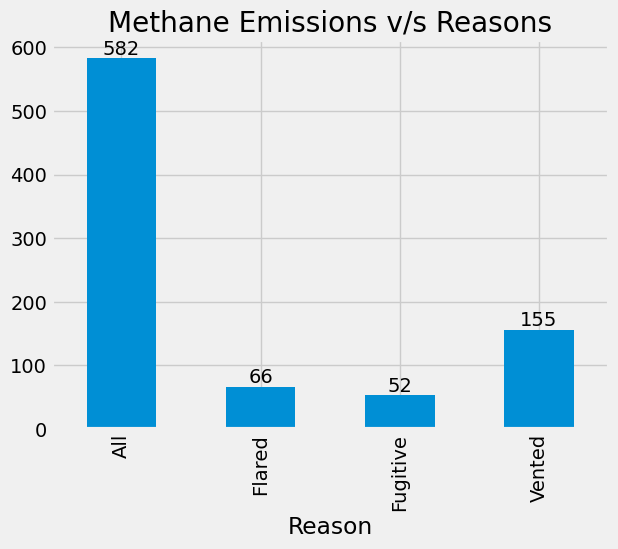

In [37]:
# plt.figure(figsize=(25, 8))
data_group = df.groupby('Reason')['Emissions'].mean()


ax = data_group.plot(kind='bar')
plt.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.title("Methane Emissions v/s Reasons")
plt.show()

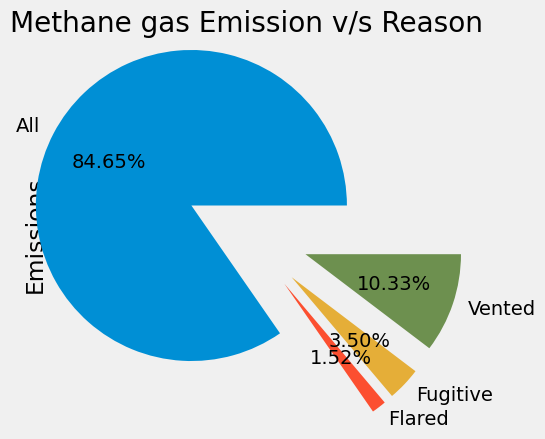

In [38]:
plt.style.use('fivethirtyeight')
explode = [0.4]*4
data_group = df.groupby('Reason')['Emissions'].sum()
data_group.plot(kind = 'pie', autopct = '%.2f%%', explode = explode)
plt.title("Methane gas Emission v/s Reason")
plt.show()

**Fugitive** **:** methane emissions occur from leakages that are not intended, for example because of a faulty seal or leaking valve.


**Vented** **:** methane emissions are the result of intentional releases, often for safety reasons, due to the design of the facility or equipment (e.g. pneumatic controllers) or operational requirements (e.g. venting a pipeline for inspection and maintenance).

**flaring** methane emissions can occur when natural gas that cannot be used or recovered economically is burned instead of being sold or vented. The vast majority of the natural gas is converted into CO2 and water, but some portion may not be combusted and is released as methane into the atmosphere.


In [39]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

Text(0.5, 1.0, 'Segment v/s Reason')

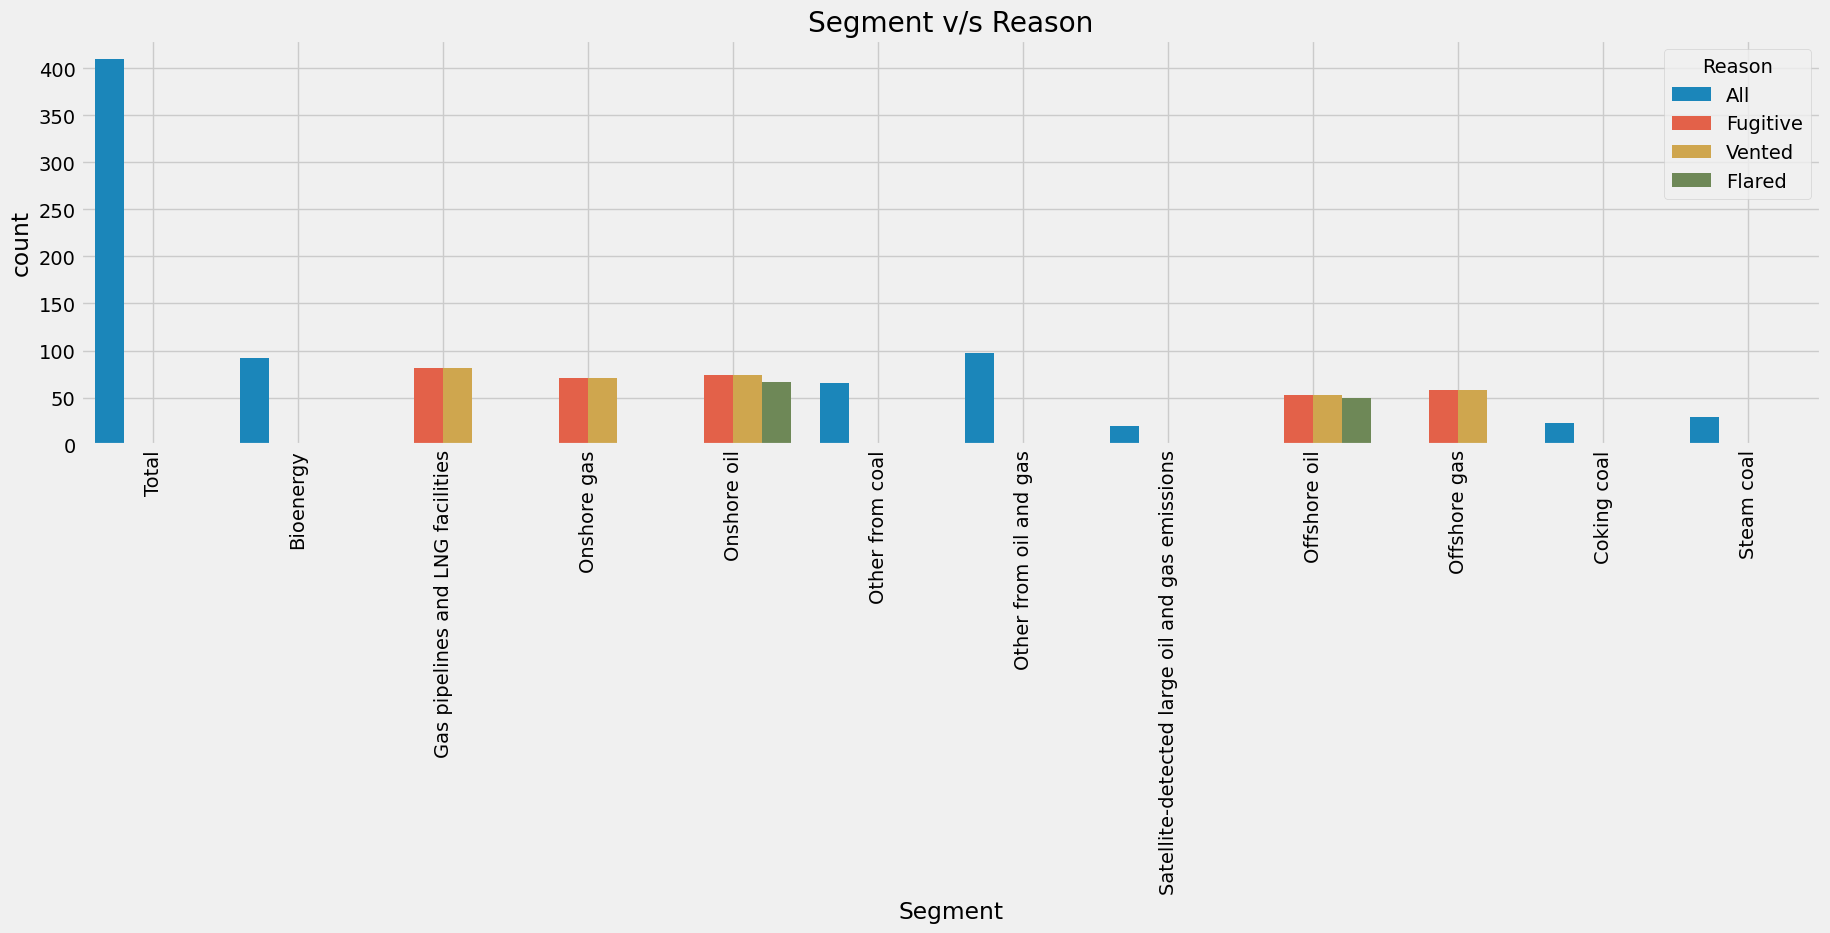

In [40]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'Segment', hue = 'Reason', data = df)

plt.xticks(rotation = 90)
plt.grid(True)
plt.title("Segment v/s Reason")

Gas Pipeline and LNG Facilities had the most Fugitive and Vented Releases and Onshore Oil had the Vented, Fugitive and  Flared Releases the most Ch4 gaseous.

In [41]:
df.columns

Index(['Region', 'Country', 'Emissions', 'Source', 'Type', 'Segment', 'Reason',
       'BaseYear'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia Pacific'),
  Text(2, 0, 'Central and South America'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Middle East'),
  Text(5, 0, 'North America'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Russia & Caspian')])

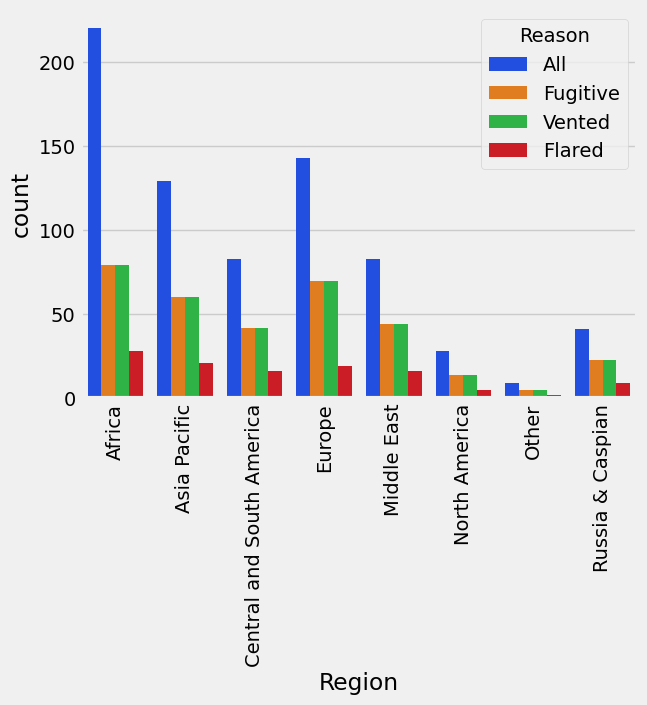

In [42]:
sns.countplot(x = 'Region', hue = 'Reason', data = df, palette = 'bright')
plt.xticks(rotation = 90)

Africa had the most of the Gases releases in the form of Vented, Fugitive and Flared Relases due to the Poor Infrastructure for maintainance. North America had the most Sophisticated Infrastructure to maintain the Oil Process Extraction.

**Conclusion :**  CH4(Methane) gas is the most cause for Global Warming and Major part of the Emissions are from North America and Asia-Pacific Countries due to Industrialisation and Poultry and Animal Husbandry Dept's of Governments.

Governments of all over the World must begin to work on Renewable Energy and Disposing the Waste released by the Agriculture, Waste and Others in a Scientific and Technological Approach.

